# SEISMIC DATA (Exploration Stage)

### Geophysical Surveys
Most widely used geophysical techniques are seismic surveys. They can be both on land and the sea floor.
  - Land acquisition using vibroseis trucks
  - Marine acquisition by boat using hydrophones and airguns.

##### Seismic Reflection
1. Artificially generated compressional seismic waves (known as P waves ) travel downwardinto the Earth.
2. These reflect off geological boundaries.
3. The waves travel back to the surface to be recorded.
4. Processed and interpreted in the office by geoscientists.

### Data from Surveys (SEG-Y)
Geoscientist use the data to make a model of sub-surface, looking for oil and gas reservoirs.
 - The standard format for 2D and 3D seismic data is SEGY. 

##### Common issues with seismic data
- Multiple reflections.
- Salt bodies, gas clouds or basalt.
- Effect of seafloor canyon.

## Reading SEG-Y files in python 

There are a few libraries that can be used to retrieve information from SEG-Y files, such as:
- segyio
- segysak

##### SEGYIO

In [43]:
# Import libraries
import segyio
import pandas as pd
import numpy as np

In [3]:
# Define file path
base_segy = 'D:\Volve Field\Seismic\ST0202ZDC12-PZ-PSDM-KIRCH-FULL-D.MIG_FIN.POST_STACK.3D.JS-017534.segy'

In [4]:
# First look at the file
f = segyio.open(base_segy, ignore_geometry = True)
print(segyio.tools.wrap(f.text[0][0:1000])) 

C01 CLIENT : STATOIL                              PROCESSED BY: WESTERNGECO
C02 AREA   : VOLVE, BLOCK 15/9,  NORTH SEA - ST0202      SURVEY: 3D 4C 0BC
C03 4D POST-STACK FINAL PSDM                     DATE: 2012-03-30
C04 DATA FORMAT: SEGY       DATA TYPE: STACK-FULL ANGLE, 3-41 DEGREES (D)
C05 ---------------------AQUISITION PARAMETRS----------------------------------
C06 DATA SHOT BY VESSEL: M/V GECO ANGLER & WESTERN INLET  CABLE LENGTH:6100 M
C07 NO OF GROUPS: 960/P,X,Y,Z.  NO OF CABLES: 2  ARRAY VOL/SOURCE: 2250 CU IN.
C08 GROUP INTERVAL: 25M     SHOT INTERVAL: 25M (FLIP-FLOP)
C09 GEODECTIC DATUM:  ED50      SPHEROID: INTERNAT 1924.     PROJECTION: UTM
C10 UTM ZONE: 31 N
C11 RECORD LENGTH: 10000 MS     SAMPLE INTERVAL: 2 MS
C12 NAVIGATION SOURCE P1/90 UKOOA, SPS
C13 ----------------------PROCESSING SEQ


In [5]:
# Extract inlines and crosslines 

ntraces = len(f.trace)
inlines = []
crosslines = []

for h in f.header:
    inlines.append(h[segyio.su.iline])
    crosslines.append(h[segyio.su.xline])
        
print(f'{ntraces} traces')
print(f'first 10 inlines: {inlines[:10]}')
print(f'first 10 crosslines: {crosslines[:10]}')

256614 traces
first 10 inlines: [9961, 9961, 9961, 9961, 9961, 9961, 9961, 9961, 9961, 9961]
first 10 crosslines: [1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972]


In [6]:
# Stablish unique values
ils = np.unique(inlines)
xls = np.unique(crosslines)

print(xls.shape)
print(ils.shape)

(640,)
(401,)


In [7]:
# Map missing values given that a complete survey must have product of (inlines * crosslines).
import itertools
real = set(zip(inlines, crosslines))
grid = set(itertools.product(ils, xls))
missing = grid - real
missing

{(9961, 1961),
 (9961, 1962),
 (9961, 2598),
 (9961, 2600),
 (9962, 1961),
 (9962, 1962),
 (9962, 2598),
 (9962, 2600),
 (10273, 1961),
 (10274, 1961),
 (10331, 1961),
 (10332, 1961),
 (10335, 1961),
 (10336, 1961),
 (10339, 1961),
 (10340, 1961),
 (10343, 1961),
 (10344, 1961),
 (10347, 1961),
 (10348, 1961),
 (10351, 1961),
 (10352, 1961),
 (10355, 1961),
 (10356, 1961),
 (10359, 1961),
 (10360, 1961)}

In [25]:
# Create a dictionary with index using enumerate
lineindex = {(il, xl):i for i, (il, xl) in enumerate(sorted(grid))}
len(lineindex)

256640

In [47]:
# Making an array of zeros with 3 dimensions to complete the whole matrix
d = np.zeros((len(ils), len(xls), len(f.samples)))
d.shape

(401, 640, 1125)

In [44]:
# Reshape the zero-matrix to fit all values
lineard = d.reshape(d.shape[0] * d.shape[1], d.shape[2])
print(lineard.shape)
print(type(lineard))

(256640, 1125)
<class 'numpy.ndarray'>


In [48]:
# Asign each trace to the corresponding position in the matrix
for il, xl, trace in zip(inlines, crosslines, f.trace):
    lineard[lineindex[il,xl]] = trace

print(lineard[lineindex[9961,1963]])
print(f.trace[0])

# As a result we have a array with values

[-7.98719725e-07 -2.04721118e-07 -4.83611018e-07 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[-7.9871973e-07 -2.0472112e-07 -4.8361102e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]


##### SEGYSAK

In [12]:
# Import libraries
import segysak
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead
from segysak.segy import segy_loader
import pathlib
import pandas as pd

In [62]:
segy_file = pathlib.Path('D:\Volve Field\Seismic\ST0202ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK.3D.JS-017534.segy')

In [8]:
get_segy_texthead(segy_file)

Text HeaderC01 CLIENT : STATOIL                              PROCESSED BY: WESTERNGECO
C02 AREA   : VOLVE, BLOCK 15/9,  NORTH SEA - ST0202      SURVEY: 3D 4C 0BC
C03 4D POST-STACK FINAL PSDM                     DATE: 2012-03-30
C04 DATA FORMAT: SEGY       DATA TYPE: STACK-FULL ANGLE, 3-41 DEGREES (T)
C05 ---------------------AQUISITION PARAMETRS----------------------------------
C06 DATA SHOT BY VESSEL: M/V GECO ANGLER & WESTERN INLET  CABLE LENGTH:6100 M
C07 NO OF GROUPS: 960/P,X,Y,Z.  NO OF CABLES: 2  ARRAY VOL/SOURCE: 2250 CU IN.
C08 GROUP INTERVAL: 25M     SHOT INTERVAL: 25M (FLIP-FLOP)
C09 GEODECTIC DATUM:  ED50      SPHEROID: INTERNAT 1924.     PROJECTION: UTM
C10 UTM ZONE: 31 N
C11 RECORD LENGTH: 10000 MS     SAMPLE INTERVAL: 2 MS
C12 NAVIGATION SOURCE P1/90 UKOOA, SPS
C13 ----------------------PROCESSING SEQUENCE----------------------------------
C14 REFORMAT, RESAMPLING TO 4MS, NAV/SEISMIC DATA MERGE
C15 Z TO P AMP. MATCH & DESIGNATURE,TIDAL STATIC CORRECTION, NOISE ATTENUATION
C16 PZ CALIBRATION & SUMMATION, DIRECT ARRIVAL REMOVAL (SHOT & RECEIVER DOMAIN)
C17 LINEAR NOISE ATTENUATION (RECEIVER DOMAIN),
C18 SELECTIVE RANDOM NOISE ATTENUATION (SHOT DOMAIN)
C19 LOW VELOCITY COHERENT NOISE MODEL AND SUBTRACTION
C20 5HZ LOW CUT FILTER, GLOBAL DEBUBBLE OPERATOR APPLIED
C21 SINGLE BOUNCE DECON IN TAU-P DOMAIN AND DWD MULTIPLE MODEL AND SUBTRACTION
C22 OFFSET REGULARIZATION, TIME LAPSE BINNING, TRACE BORROWING, PrSDM
C23 DEPTH TO TIME CONVERSION, RESIDUAL VELOCITY ESTIMATION AND APPLICATION
C24 ANGLE MUTE (3-41 DEGREES), STACK,  INVERSE_Q (100)
C25 RANDOM NOISE ATTENUATION, BPF 5Hz 18dB/OCT LOW-CUT
C26 12.5X12.5 INTERPOLATION, OUTPUT SEGY FORMAT
C27 ----------------------DATA LENGTH AND SAMPLING-------------------------
C28 FIRST SAMPLE: 4 MS     LAST SAMPLE: 3400 MS     SAMPLE INTERVAL: 4 MS
C29 ----------------------PROCESSING GRID INFORMATION-------------------------
C30 INLINE  BIN SIZE: 12.5M   CROSSLINE BIN SIZE: 12.5M  AZIMUTH: 284 DEGREES
C31 INLINE NUMBER INCREMENT:1       CROSSLINE  NUMBER INCREMENT:1
C32 PG1   X: 439272.97   Y: 6475068.89   IL:   9961   XL: 1881
C33 PG2   X: 429582.21   Y: 6477485.37   IL:   9961   XL: 2680
C34 PG3   X: 440588.57   Y: 6480344.84   IL:  10396   XL: 1881
C35 PG4   X: 430897.81   Y: 6482761.32   IL:  10396   XL: 2680
C36 ----------------------HEADER WORD POSITIONS--------------------------------
C37 CMP  BYTES 21-24 ¦ 3D INLINE  BYTES 189-192 ¦ 3D CROSS LINE  BYTES 193-196
C38 BIN CENTRE UTM-X  BYTES 181-184.  ¦  BIN CENTRE UTM-Y  BYTES 185-188
C39 ALL COORDINATE VALUES ARE MULTIPLIED BY 100
C40 END EBCDIC

In [20]:
# Scan the data looking for traces (inlines, crosslines)
scan = segy_header_scan(segy_file, max_traces_scan=2000)
with pd.option_context('display.max_rows', 100):
    display(scan)

100%|██████████| 2.00k/2.00k [00:00<00:00, 8.72k traces/s]


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,1.000500e+03,5.774946e+02,1.000000e+00,5.007500e+02,1.000500e+03,1.500250e+03,2.000000e+03
TRACE_SEQUENCE_FILE,5,2000.0,1.000500e+03,5.774946e+02,1.000000e+00,5.007500e+02,1.000500e+03,1.500250e+03,2.000000e+03
FieldRecord,9,2000.0,1.007047e+03,5.806505e+02,3.000000e+00,5.027500e+02,1.007500e+03,1.510250e+03,2.011000e+03
TraceNumber,13,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
EnergySourcePoint,17,2000.0,2.268357e+03,1.887114e+02,1.961000e+03,2.099000e+03,2.266000e+03,2.432250e+03,2.600000e+03
CDP,21,2000.0,1.260357e+03,7.172966e+02,8.300000e+01,5.827500e+02,1.246500e+03,1.908250e+03,2.568000e+03
CDP_TRACE,25,2000.0,3.070840e+02,1.886302e+02,1.000000e+00,1.380000e+02,3.045000e+02,4.710000e+02,6.400000e+02
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NSummedTraces,31,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NStackedTraces,33,2000.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [47]:
trace_headers = segy_header_scrape(segy_file)
trace_headers[['INLINE_3D','CROSSLINE_3D']]

100%|██████████| 257k/257k [00:24<00:00, 10.5k traces/s]


,INLINE_3D,CROSSLINE_3D
0,9961,1963
1,9961,1964
2,9961,1965
3,9961,1966
4,9961,1967
...,...,...
256609,10361,2596
256610,10361,2597
256611,10361,2598
256612,10361,2599


In [52]:
seis_vol = segy_loader(segy_file)

100%|██████████| 257k/257k [00:22<00:00, 11.2k traces/s]


                               byte_loc     count  ...           max  unique
TRACE_SEQUENCE_LINE                   1  256614.0  ...  2.566140e+05  256614
TRACE_SEQUENCE_FILE                   5  256614.0  ...  2.566140e+05  256614
FieldRecord                           9  256614.0  ...  2.570400e+05  256614
EnergySourcePoint                    17  256614.0  ...  2.600000e+03     640
CDP                                  21  256614.0  ...  3.207200e+05  256614
CDP_TRACE                            25  256614.0  ...  6.400000e+02     640
MuteTimeEND                         113  256614.0  ...  8.000000e+00       2
CDP_X                               181  256614.0  ...  4.395125e+07  232749
CDP_Y                               185  256614.0  ...  6.482095e+08  221405
INLINE_3D                           189  256614.0  ...  1.036100e+04     401
CROSSLINE_3D                        193  256614.0  ...  2.600000e+03     640
ShotPoint                           197  256614.0  ...  6.790185e+08     401

Converting SEGY: 100%|██████████| 257k/257k [01:48<00:00, 2.37k traces/s] 


In [65]:
seis_vol_1 = segy_loader(segy_file, iline=189, xline=193, cdpx=181, cdpy=185, vert_domain="DEPTH", extra_byte_fields={"my_name":117})
print(seis_vol_1)

100%|██████████| 257k/257k [00:24<00:00, 10.6k traces/s]


Loading as 3D
Fast direction is INLINE_3D


Converting SEGY: 100%|██████████| 257k/257k [01:53<00:00, 2.26k traces/s]  


<xarray.Dataset>
Dimensions:  (iline: 401, xline: 640, depth: 850)
Coordinates:
  * iline    (iline) uint16 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint16 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * depth    (depth) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 nan nan 4.383e+05 ... 4.318e+05 4.318e+05
    cdp_y    (iline, xline) float32 nan nan 6.475e+06 ... 6.482e+06 6.482e+06
Data variables:
    data     (iline, xline, depth) float32 0.0 0.0 0.0 ... 0.006053 0.006397 0.0
    my_name  (iline, xline) float32 nan nan 4e+03 4e+03 ... 4e+03 4e+03 4e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT : STATOIL                              PR...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         ST0202ZDC12-PZ-PSDM-K

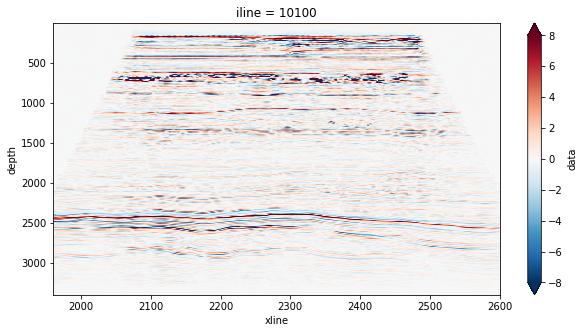

In [55]:
_= seis_vol_1.sel(iline=10100).data.T.plot(yincrease=False, figsize=(10,5), vmax=8)

In [63]:
seis_vol_filter = segy_loader(segy_file, head_df = trace_headers[trace_headers['INLINE_3D'] <= 10100].copy())

                               byte_loc    count  ...           max  unique
TRACE_SEQUENCE_LINE                   1  89592.0  ...  8.959200e+04   89592
TRACE_SEQUENCE_FILE                   5  89592.0  ...  8.959200e+04   89592
FieldRecord                           9  89592.0  ...  8.973900e+04   89592
EnergySourcePoint                    17  89592.0  ...  2.600000e+03     640
CDP                                  21  89592.0  ...  1.119200e+05   89592
CDP_TRACE                            25  89592.0  ...  6.400000e+02     640
MuteTimeEND                         113  89592.0  ...  8.000000e+00       2
CDP_X                               181  89592.0  ...  4.387230e+07   80970
CDP_Y                               185  89592.0  ...  6.478929e+08   81881
INLINE_3D                           189  89592.0  ...  1.010000e+04     140
CROSSLINE_3D                        193  89592.0  ...  2.600000e+03     640
ShotPoint                           197  89592.0  ...  6.619136e+08     140
TraceIdentif

Converting SEGY:  35%|███▍      | 89.6k/257k [00:43<01:20, 2.08k traces/s]


In [69]:
seis_vol_1.dims

Frozen({'iline': 401, 'xline': 640, 'depth': 850})

In [70]:
seis_vol_1.coords

Coordinates:
  * iline    (iline) uint16 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint16 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * depth    (depth) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 nan nan 4.383e+05 ... 4.318e+05 4.318e+05
    cdp_y    (iline, xline) float32 nan nan 6.475e+06 ... 6.482e+06 6.482e+06

In [72]:
seis_vol_1.iline

<xarray.DataArray 'iline' (iline: 401)>
array([ 9961,  9962,  9963, ..., 10359, 10360, 10361], dtype=uint16)
Coordinates:
  * iline    (iline) uint16 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361

In [74]:
seis_vol_1.sel(iline=10100, xline=range(2000,2010,1))

<xarray.Dataset>
Dimensions:  (xline: 10, depth: 850)
Coordinates:
    iline    uint16 10100
  * xline    (xline) uint16 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
  * depth    (depth) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (xline) float32 4.382e+05 4.382e+05 ... 4.382e+05 4.381e+05
    cdp_y    (xline) float32 6.477e+06 6.477e+06 ... 6.477e+06 6.477e+06
Data variables:
    data     (xline, depth) float32 -8.627e-06 8.081e-06 -1.06e-06 ... 0.0 0.0
    my_name  (xline) float32 4e+03 4e+03 4e+03 4e+03 ... 4e+03 4e+03 4e+03 4e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT : STATOIL                              PR...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         ST0202ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK....
    srd:                 None
    datatype:            None
    percentiles:         [-1.5818673664530445, -1.397366263523117, -0.1279947...
    coord_scalar:        -100.0

In [80]:
seis_vol_1.iline.values[:10]

array([9961, 9962, 9963, 9964, 9965, 9966, 9967, 9968, 9969, 9970],
      dtype=uint16)

In [96]:
seis_vol_1.cdp_x.transpose('iline','xline')

<xarray.DataArray 'cdp_x' (iline: 401, xline: 640)>
array([[      nan,       nan, 438278.38, ...,       nan, 430564.66,
              nan],
       [      nan,       nan, 438281.5 , ...,       nan, 430567.66,
              nan],
       [438308.72, 438296.6 , 438284.47, ..., 430582.75, 430570.62,
        430558.5 ],
       ...,
       [      nan, 439494.3 , 439482.16, ..., 431780.47, 431768.3 ,
        431756.22],
       [      nan, 439497.22, 439485.12, ..., 431783.44, 431771.3 ,
        431759.2 ],
       [439512.47, 439500.34, 439488.22, ..., 431786.56, 431774.44,
        431762.3 ]], dtype=float32)
Coordinates:
  * iline    (iline) uint16 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint16 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
    cdp_x    (iline, xline) float32 nan nan 4.383e+05 ... 4.318e+05 4.318e+05
    cdp_y    (iline, xline) float32 nan nan 6.475e+06 ... 6.482e+06 6.482e+06

In [93]:
seis_vol_1.iline.max()

<xarray.DataArray 'iline' ()>
array(10361, dtype=uint16)

In [94]:
seis_vol_1.interp()

<xarray.Dataset>
Dimensions:  (iline: 401, xline: 640, depth: 850)
Coordinates:
  * iline    (iline) uint16 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint16 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
  * depth    (depth) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
    cdp_x    (iline, xline) float32 nan nan 4.383e+05 ... 4.318e+05 4.318e+05
    cdp_y    (iline, xline) float32 nan nan 6.475e+06 ... 6.482e+06 6.482e+06
Data variables:
    data     (iline, xline, depth) float32 0.0 0.0 0.0 ... 0.006053 0.006397 0.0
    my_name  (iline, xline) float32 nan nan 4e+03 4e+03 ... 4e+03 4e+03 4e+03
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01 CLIENT : STATOIL                              PR...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         ST0202ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK....
    srd:                 None
    datatype:            None
    percentiles:         [-1.5818673664530445, -1.397366263523117, -0.1279947...
    coord_scalar:        -100.0

In [95]:
seis_vol_1.iline.broadcast_like(seis_vol_1.cdp_x)

<xarray.DataArray 'iline' (iline: 401, xline: 640)>
array([[ 9961,  9961,  9961, ...,  9961,  9961,  9961],
       [ 9962,  9962,  9962, ...,  9962,  9962,  9962],
       [ 9963,  9963,  9963, ...,  9963,  9963,  9963],
       ...,
       [10359, 10359, 10359, ..., 10359, 10359, 10359],
       [10360, 10360, 10360, ..., 10360, 10360, 10360],
       [10361, 10361, 10361, ..., 10361, 10361, 10361]], dtype=uint16)
Coordinates:
  * iline    (iline) uint16 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint16 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600

In [100]:
seis_vol_1.seisio.to_netcdf('D:/Volve Field/Seismic/test.seis')

In [101]:
from segysak import open_seisnc
open_seisnc('D:/Volve Field/Seismic/test.seis')

<xarray.Dataset>
Dimensions:  (iline: 401, xline: 640, depth: 850)
Coordinates:
    cdp_x    (iline, xline) float32 ...
    cdp_y    (iline, xline) float32 ...
  * depth    (depth) float64 4.0 8.0 12.0 16.0 ... 3.392e+03 3.396e+03 3.4e+03
  * iline    (iline) uint16 9961 9962 9963 9964 9965 ... 10358 10359 10360 10361
  * xline    (xline) uint16 1961 1962 1963 1964 1965 ... 2597 2598 2599 2600
Data variables:
    data     (iline, xline, depth) float32 ...
    my_name  (iline, xline) float32 ...
Attributes: (12/13)
    coord_scalar:        -100.0
    measurement_system:  m
    percentiles:         [-1.58186737e+00 -1.39736626e+00 -1.27994709e-01  1....
    sample_rate:         4.0
    source_file:         ST0202ZDC12-PZ-PSDM-KIRCH-FULL-T.MIG_FIN.POST_STACK....
    text:                C01 CLIENT : STATOIL                              PR...
    ...                  ...
    d3_domain:           None
    epsg:                None
    corner_points:       None
    corner_points_xy:    None
    srd:                 None
    datatype:            None